# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(1,1))
plt.imshow(gray_image, cmap="gray")
print(y_train[index])

13


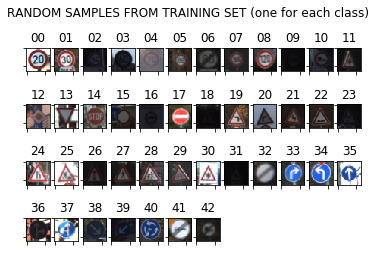

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# show a random sample from each class of the traffic sign dataset
rows, cols = 4, 12
fig, ax_array = plt.subplots(rows, cols)
plt.suptitle('RANDOM SAMPLES FROM TRAINING SET (one for each class)')
for class_idx, ax in enumerate(ax_array.ravel()):
    if class_idx < n_classes:
        # show a random image of the current class
        cur_X = X_train[y_train == class_idx]
        cur_img = cur_X[np.random.randint(len(cur_X))]
        ax.imshow(cur_img)
        ax.set_title('{:02d}'.format(class_idx))
    else:
        ax.axis('off')
# hide both x and y ticks
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.draw()

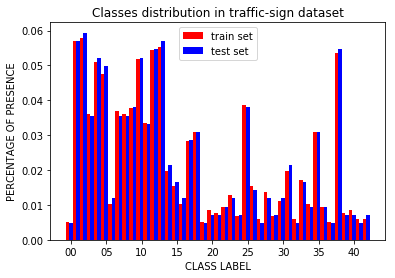

In [5]:
# bar-chart of classes distribution
train_distribution, test_distribution = np.zeros(n_classes), np.zeros(n_classes)
for c in range(n_classes):
    train_distribution[c] = np.sum(y_train == c) / n_train
    test_distribution[c] = np.sum(y_test == c) / n_test
fig, ax = plt.subplots()
col_width = 0.5
bar_train = ax.bar(np.arange(n_classes), train_distribution, width=col_width, color='r')
bar_test = ax.bar(np.arange(n_classes)+col_width, test_distribution, width=col_width, color='b')
ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')
ax.set_title('Classes distribution in traffic-sign dataset')
ax.set_xticks(np.arange(0, n_classes, 5)+col_width)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0]), ('train set', 'test set'))
plt.show()

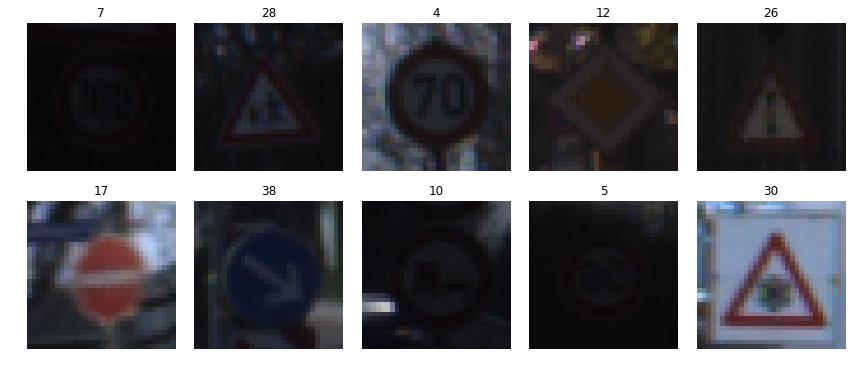

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def PreprocessImage(image,convertion_type):
    
    if image.dtype == np.uint8:
            image = np.array(image/255.0, dtype=np.float32)
            
    converted_image = cv2.cvtColor(image,convertion_type)    
    
    #converted_image  = (gray_image - 128)/128
    

    return converted_image

def AddAugumentedImages(images,labels):
    
    
    one_time = False
    
    #find first index of each label
    for i in range(n_classes):
        search_index = None
        #print(labels)
        search_array = np.where(labels == i)
        
        #print(search_array)
        
        if len(search_array[0]) != 0:
            
            for k in range(10):
                search_index = search_array[0][k]
            
            
                if(search_index is not None and search_index < len(images)):
                    org_img = images[search_index]
                
                    # create the generator to perform online data augmentation
                    image_gen = ImageDataGenerator(rotation_range=15.,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=0.5)
                
                    # expand dimension to one sample
                    samples = expand_dims(org_img, 0)

                    it = image_gen.flow(samples, batch_size=1)
                
                    for j in range(5):
                        batch = it.next()
                    
                        # convert to unsigned integers
                        new_image = batch[0].astype('uint8')

                        images = np.concatenate((images,[new_image]))
                        labels = np.concatenate((labels,[i]))
                
    
    return images,labels

def PrepprocessData(X_data,y_data = None,training_data = False):
    
    if y_data is not None:
        #if training_data is True:
            #X_data,y_data = AddAugumentedImages(X_data,y_data)
        
        X_data, y_data = shuffle(X_data,y_data)

    tmp_X_data = []

    
    
    for i in range(len(X_data)):    
        tmp_X_data.append(PreprocessImage(X_data[i],cv2.COLOR_BGR2GRAY))


    X_data = np.array(tmp_X_data).reshape(X_data.shape[0],32,32,1)
    
    if y_data is None:
        return X_data
    else:
        return  X_data,y_data

#x,y = AddAugumentedImages(X_valid,y_valid)

Using TensorFlow backend.


### Model Architecture

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x):

    mu = 0
    sigma = 0.1
    keep_prob = 0.7
    
    #Layer 1
    #first layer is will map 32x32x1 to 28x28x30
    conv1_filter_weights = tf.Variable(tf.truncated_normal(shape = (3,3,1,30),mean = mu,stddev = sigma)) # (height, width, input_depth, output_depth)
    conv1_filter_bias = tf.Variable(tf.zeros(30))
    conv1 = tf.nn.conv2d(x,conv1_filter_weights,strides = [1,1,1,1],padding = 'VALID') + conv1_filter_bias

    #layer1 activation
    conv1 = tf.nn.relu(conv1)
    
                      
    #pooling of layer1 Input = 28x28x60 Output = 14x14x60
    conv1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    conv1 = tf.nn.dropout(conv1,keep_prob)

    #Layer2  Input = 14x14x60      Output = 10x10x60
    conv2_filter_weights = tf.Variable(tf.truncated_normal(shape = (3,3,30,60),mean = mu,stddev = sigma))
    conv2_filter_biases = tf.Variable(tf.zeros(60))
    conv2 = tf.nn.conv2d(conv1,conv2_filter_weights,strides = [1,1,1,1],padding = 'VALID') + conv2_filter_biases

    #layer2 activation
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2,keep_prob)


    #layer2 max pooling Input = 10x10x60   Output = 5x5x60
    conv2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')

    #Layer 3 input = 5x5x128   Output = 4000
    #flatten the data for full connecte network
    fc0 = flatten(conv2)

    #Layer4 input = 2160   Output = 1000
    
    fc1_w = tf.Variable(tf.truncated_normal(shape = (2160,1000),mean = mu,stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1000))
    fc1 = tf.matmul(fc0,fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    #Layer5 input = 2000   Output = 100
    fc2_w = tf.Variable(tf.truncated_normal(shape = (1000,100),mean = mu,stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)

    #Layer5 input = 100 output = 43
    fc3_w = tf.Variable(tf.truncated_normal(shape = (100,n_classes), mean = mu, stddev = sigma  ))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2,fc3_w)+fc3_b
    
    return logits
                      
                      

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
epochs = 30
batch_size = 128
save_file = './training_output/model.ckpt'
### Calculate and report the accuracy on the training and validation set.
### Train your model here.
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
logits = LeNet(x)

In [10]:
X_train,y_train = PrepprocessData(X_train,y_train,True)
X_valid,y_valid = PrepprocessData(X_valid,y_valid)
X_test,y_test = PrepprocessData(X_test,y_test)

In [11]:
from sklearn.model_selection import train_test_split
import time

def evaluate(X_data,y_data):
    global accuracy_operation
    global batch_size,x,y
    
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y = X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation,feed_dict = {x:batch_x,y:batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy/num_examples



def Start_trainning():
    
    global batch_size,X_train,y_train,X_valid,y_valid,X_test,y_test
    
    global one_hot_y,training_operation,accuracy_operation,x,y
    

    


    one_hot_y = tf.one_hot(y,43)

    
    rate = 0.001
    
    

        
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    

    ### Once a final model architecture is selected, 
    ### the accuracy on the test set should be calculated and reported as well.
    correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    saver = tf.train.Saver()
    
    validation_accuracy = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        
        print("Training...")
        for i in range(epochs):
            
            if validation_accuracy > 0.93:
                break
            
            X_train,y_train = shuffle(X_train,y_train)
            
            if epochs> 12:
                rate = rate/2
            #X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=int(time.time()))

            for offset in range(0,num_examples,batch_size):
                batch_x,batch_y = X_train[offset:offset+batch_size],y_train[offset:offset+batch_size]
                sess.run(training_operation,feed_dict = {x:batch_x,y:batch_y})
            validation_accuracy = evaluate(X_valid,y_valid)
            train_accuracy = evaluate(X_train,y_train)
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("--------------------------------")
            
        saver.save(sess,save_file)
        print("model saved")

def test_data():

    global X_test,y_test
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess,save_file)
        
        test_accuracy = evaluate(X_test,y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
    
Start_trainning()
test_data()


Training...
EPOCH 1 ...
Train Accuracy = 0.688
Validation Accuracy = 0.611
--------------------------------
EPOCH 2 ...
Train Accuracy = 0.869
Validation Accuracy = 0.786
--------------------------------
EPOCH 3 ...
Train Accuracy = 0.913
Validation Accuracy = 0.838
--------------------------------
EPOCH 4 ...
Train Accuracy = 0.941
Validation Accuracy = 0.869
--------------------------------
EPOCH 5 ...
Train Accuracy = 0.956
Validation Accuracy = 0.876
--------------------------------
EPOCH 6 ...
Train Accuracy = 0.965
Validation Accuracy = 0.889
--------------------------------
EPOCH 7 ...
Train Accuracy = 0.970
Validation Accuracy = 0.896
--------------------------------
EPOCH 8 ...
Train Accuracy = 0.975
Validation Accuracy = 0.909
--------------------------------
EPOCH 9 ...
Train Accuracy = 0.974
Validation Accuracy = 0.901
--------------------------------
EPOCH 10 ...
Train Accuracy = 0.979
Validation Accuracy = 0.909
--------------------------------
EPOCH 11 ...
Train Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:

import numpy as np
import os
import csv


def read_csv_file(file_name):
    csv_reader = None
    with open(str(file_name), mode='r') as csv_file:

        sign_names = []
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            sign_names.append(row["SignName"])
            
    
    return sign_names


### Load the images and plot them here.
def readImages(folder_name):
    
    #the list that will contain all calibraion images
    images_list = []
    
    #select the source folder for calibration images
    images_names = os.listdir(str(folder_name))

    images_names.remove(".ipynb_checkpoints")
    
    for image_name in images_names:
        #construct the full path of the image
        image_full_name = str(folder_name)+str("/")+str(image_name)

        #read the image
        image = cv2.imread(image_full_name)


    
        
        images_list.append(image)
        
    return images_names,images_list


### Predict the Sign Type for Each Image

In [21]:
import numpy as np
import cv2
### Run the predictions here and use the model to output the prediction for each image.
def prepare_testing_data():
    
    test_images_names,org_test_images_list = readImages("test_images")
    
    test_images_list = []
    
    for i in range(len(org_test_images_list)):
        dim = (32,32)
        img = cv2.resize(org_test_images_list[i],dim)
        test_images_list.append(img)
    
    final_images = np.array(test_images_list)
    
    
        
    preprocessed_images = PrepprocessData(final_images)
    
    
    return preprocessed_images,test_images_names,org_test_images_list
    

def predict_images(preprocessed_images,sign_names):
    
    global logits,x

    
    
    found_sign_names = []
    found_sign_values = []
    
    
    
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        saver.restore(sess,save_file)
        predection_list = np.array(sess.run(logits,feed_dict = {x:preprocessed_images}))

        
    
    for i in range(len(predection_list)):
        found_sign_values.append(np.argmax(predection_list[i]))
        found_sign_names.append(sign_names[np.argmax(predection_list[i])])
        
    return found_sign_names,found_sign_values
        
sign_names = read_csv_file('signnames.csv')    
preprocessed_images,images_files_names,org_test_images_list = prepare_testing_data()

test_sign_names = {"img1.jpg":"General caution",
                   "img2.jpg":"Go straight or right",
                   "img3.jpg":"No entry",
                   "img4.jpg":"Speed limit (60km/h)",
                   "img5.jpg":"Stop"}


test_sign_values = {"img1.jpg":18,
                   "img2.jpg":36,
                   "img3.jpg":17,
                   "img4.jpg":3,
                   "img5.jpg":14}


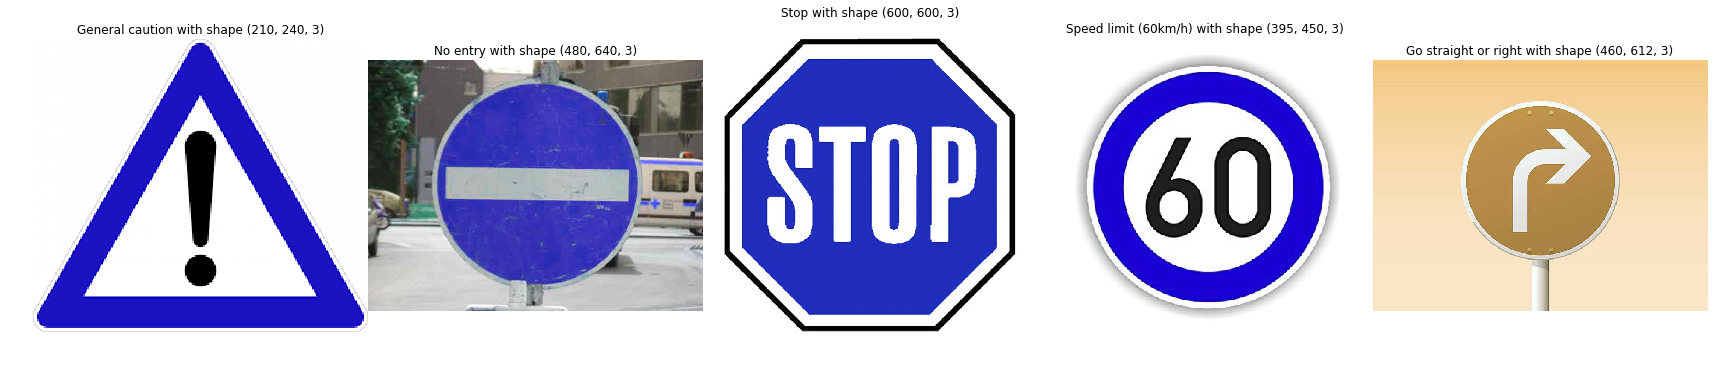

In [22]:
fig, axs = plt.subplots(1,5, figsize=(30, 6))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()


for i in range(len(org_test_images_list)):

    image = org_test_images_list[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(test_sign_names[images_files_names[i]]+str(" with shape ")+str(image.shape))


In [23]:
found_sign_names,found_sign_values = predict_images(preprocessed_images,sign_names)


test_sign_names_list = []
for i in range(len(images_files_names)):
    test_sign_names_list.append(test_sign_names[images_files_names[i]])

print("real sign names are "+str(test_sign_names_list))
print("predicted sign names are "+str(found_sign_names))


INFO:tensorflow:Restoring parameters from ./training_output/model.ckpt
real sign names are ['General caution', 'No entry', 'Stop', 'Speed limit (60km/h)', 'Go straight or right']
predicted sign names are ['General caution', 'No entry', 'Stop', 'Speed limit (60km/h)', 'Right-of-way at the next intersection']


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
def calculate_test_data_accuracy(found_sign_values):
    
    
    count = 0
    for i in range(len(found_sign_values)):
        if(found_sign_values[i] == test_sign_values[images_files_names[i]]):
            count = count + 1
    
    accuracy = np.float32(count/len(found_sign_values))
    
    return accuracy

test_accuracy = calculate_test_data_accuracy(found_sign_values)
print("accuracy is "+str(test_accuracy))


accuracy is 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./training_output/model.ckpt
Top 5 model predictions for image 0 (Target is 18)
   Prediction = 18 with confidence 1.00
   Prediction = 26 with confidence 0.00
   Prediction = 40 with confidence 0.00
   Prediction = 27 with confidence 0.00
   Prediction = 20 with confidence 0.00
Top 5 model predictions for image 1 (Target is 17)
   Prediction = 17 with confidence 1.00
   Prediction = 09 with confidence 0.00
   Prediction = 33 with confidence 0.00
   Prediction = 20 with confidence 0.00
   Prediction = 32 with confidence 0.00
Top 5 model predictions for image 2 (Target is 14)
   Prediction = 14 with confidence 1.00
   Prediction = 10 with confidence 0.00
   Prediction = 05 with confidence 0.00
   Prediction = 03 with confidence 0.00
   Prediction = 35 with confidence 0.00
Top 5 model predictions for image 3 (Target is 03)
   Prediction = 03 with confidence 0.15
   Prediction = 05 with confidence 0.85
   Prediction = 23 with confidence 0.00
   Pr

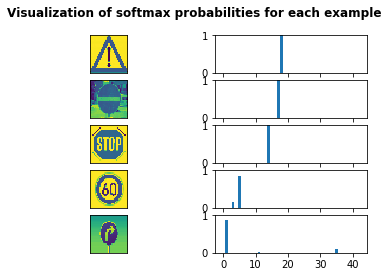

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
saver = tf.train.Saver()
    
with tf.Session() as sess:
    saver.restore(sess,save_file)
    
    # certainty of predictions
    K = 5
    top_5 = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: preprocessed_images})

    # compute softmax probabilities
    softmax_probs = sess.run(tf.nn.softmax(logits), feed_dict={x: preprocessed_images})
    
    # plot softmax probs along with traffic sign examples
    n_images = preprocessed_images.shape[0]
    fig, axarray = plt.subplots(n_images, 2)
    plt.suptitle('Visualization of softmax probabilities for each example', fontweight='bold')
    for r in range(0, n_images):
        axarray[r, 0].imshow(np.squeeze(preprocessed_images[r]))
        axarray[r, 0].set_xticks([]), axarray[r, 0].set_yticks([])
        plt.setp(axarray[r, 0].get_xticklabels(), visible=False)
        plt.setp(axarray[r, 0].get_yticklabels(), visible=False)
        axarray[r, 1].bar(np.arange(n_classes), softmax_probs[r])
        axarray[r, 1].set_ylim([0, 1])
    
    # print top K predictions of the model for each example, along with confidence (softmax score)    
    for i in range(len(preprocessed_images)):
        print('Top {} model predictions for image {} (Target is {:02d})'.format(K, i, test_sign_values[images_files_names[i]]))
        for k in range(K):
            top_c = top_5[1][i][k]
            print('   Prediction = {:02d} with confidence {:.2f}'.format(top_c, softmax_probs[i][top_c]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")